In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df=pd.read_csv('Social_Network_Ads.csv ')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [6]:
import seaborn as sns

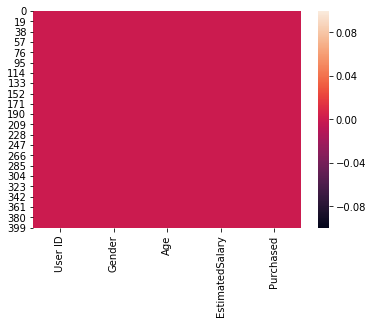

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


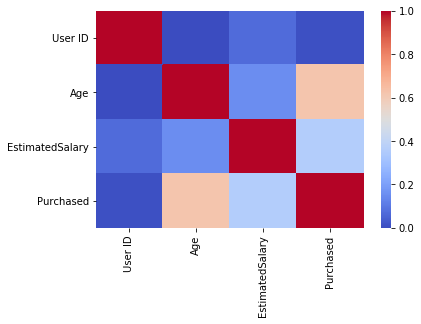

In [9]:
sns.heatmap(df.corr(),cmap='coolwarm')

In [10]:
gender_binary=pd.get_dummies(df['Gender'],drop_first=True)

In [11]:
df=pd.concat([df,gender_binary],axis=1)

In [12]:
df.drop(['Gender',],axis=1,inplace=True)

In [13]:
df.head(2)

,User ID,Age,EstimatedSalary,Purchased,Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1


In [14]:
df.drop(['User ID'],axis=1,inplace=True)

In [15]:
df.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


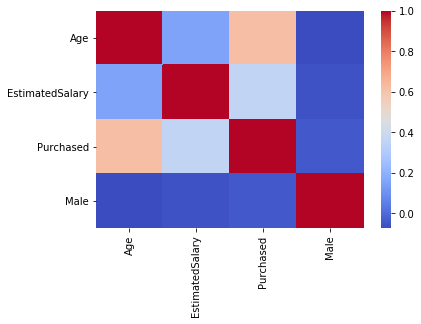

In [16]:
sns.heatmap(df.corr(),cmap='coolwarm')

In [17]:
df.drop('Male', axis =1, inplace=True)

In [18]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [19]:
df.mean()

Age                   37.6550
EstimatedSalary    69742.5000
Purchased              0.3575
dtype: float64

In [20]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [21]:
y=df['Purchased']

In [22]:
x=df[['Age','EstimatedSalary']]

In [23]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [24]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.3)

In [41]:
from sklearn.svm import SVC
classifier =SVC()
classifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
y_pred=classifier.predict(x_test)

In [43]:
y_pred.shape

(120,)

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[78,  1],
       [33,  8]], dtype=int64)